MODELO PRESA DEPREDADOR - ECUACIONES LOTKA-VOLTERRA


En este modelo presa depredador se modela el número de individuos de dos poblaciones (presas y depredadores) con respecto al tiempo.
Se deben tener algunas consideraciones como:

* El sistema es aislado (no migran, no hay otras especies, no hay plagas)
* Las presas tienen un suministro ilimitado de comida por un tiempo finito
* las presas se reproducen exponencialmente en ausencia de depredadores
* La interaccion entre las dos especies provoca el crecimiento de los depredadores y el decrecimiento de las presas
* El decrecimiento de los depredadores se da por muerte natural
* A mayor número de depredadores, debe haber un mayor número de victimas de las presas para mantener la población.


EXPRESIONES:


* Presa:

$\frac{dx}{dt}= \alpha x - \beta x y$

En la expresión anterior $\alpha x$ representa el crecimiento de la población y $\beta x y $ representa el encuentro entre las dos especies(negativo para las presas).

Los parámetros puees $\alpha$ y $\beta$ son respectivamente: tasa de crecimiento de las presas y el éxito en la caza por parte del depredador

* Depredador:

$\frac{dy}{dt}= \delta x y- \gamma  y$


En esta expresión $\delta x y$ representa la interacción entre las dos especies (favorable para los depredadores). $\gamma y$ representa la muerte de los depredadores.

$\gamma$ será la tasa de mortalidad de los depredadores y $\delta$ el éxito de la caza y cuanto se alimenta el depredador.

Se puede apreciar que las dos ecuaciones están acopladas, por ende se usará el método de runge kutta para resolver el problema de forma numérica. Como primera aproximación se usa la libreria sicpy.integrate y su método de integración odeint.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

In [2]:
%matplotlib inline

Se definen los parámetros $\alpha, \beta, \delta,\gamma$ del sistema considerado y las condiciones iniciales

In [3]:
# parámetros para el sistema considerado
alfa = 1
beta = 0.5
delta = 2
gamma = 0.5
#condiciones iniciales
x_0 = 2 # presas iniciales
y_0 = 2 # depredadores iniciales
condiciones_iniciales =np.array([x_0, y_0])

Se define el sistema de ecuaciones diferenciales utilizando una matriz así:

In [4]:
def sistema_(x,t,alfa,beta,gamma,delta):
    # x[0] equivale a x, x[1] equivale a y
    dx = alfa*x[0]-beta*x[0]*x[1] # ecuación presa
    dy = -delta*x[1]+gamma*x[0]*x[1]  # ecuación depredador
    return np.array([dx, dy])

Lo anterior es relacionado con el modelo como tal, para la implementación numérica, se necesitan unos parámetros de simulación así:

In [26]:
# condiciones de simulación
tiempo_inicial = 0 
tiempo_final = 500
delta_t = .1 # intervalo temporal
N = int((tiempo_final-tiempo_inicial)/(delta_t)) # número de divisiones 
tiempo = np.linspace(tiempo_inicial, tiempo_final, N) # vector de tiempo
print('Tamaño del vector temporal = ',N)

Tamaño del vector temporal =  5000


Para utilizar el método de odeint se realiza de la siguiente forma:

ODEINT(función matricial de EDOS, condiciones iniciales, vector de tiempo(dominio), argumentos )

In [27]:
# solución del sistema de ecuaciones acopladas
integracion, infodict= odeint(sistema_, condiciones_iniciales, tiempo,args = (alfa,beta,gamma,delta),full_output=True)
infodict['message']  # se muestra un mensaje del status de la integración

'Integration successful.'

Como a la función odeint se le pasa una matriz con dos ecuaciones incognitas, esta regresa dos soluciones en una matriz de N x 2, por lo tanto estos valores se sustraen así:


In [28]:
presa, depredador = integracion.T # transpuesta del arreglo  para obtener vectores

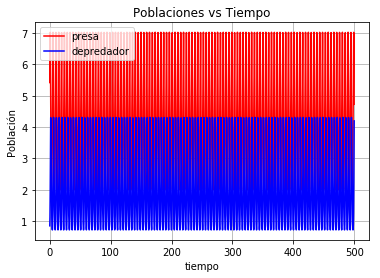

In [29]:
# gráfica de resultados
plt.figure(1)
plt.title("Poblaciones vs Tiempo")
plt.plot(tiempo, presa, color = 'red', label='presa')
plt.plot(tiempo, depredador , color = 'blue', label='depredador')
plt.xlabel('tiempo')
plt.ylabel('Población')
plt.grid(True)
plt.legend(loc='best')

A continuación se muestra un plano fase de cantidad de presas vs cantidad de depredadores

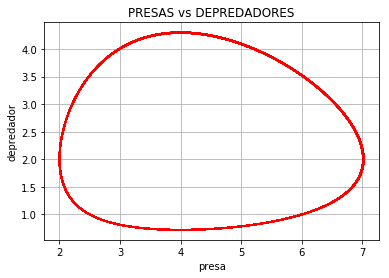

In [30]:
plt.figure(2)
plt.title("PRESAS vs DEPREDADORES")
plt.plot(presa, depredador, color = 'red')
plt.xlabel('presa')
plt.ylabel('depredador')
plt.grid(True)
plt.show()

Esta gráfica indica que el tamaño de las poblaciones es cíclico, un aumento del número de presas, aumenta el número depredadores, que posteriormente reduce las presas y el número de depredadores, lo que aumenta el número de presas, y se repite el ciclo. Para visualizar la dirección en la que ocurre el proceso se utiliza la función quiver (direcciones del plano fase)

/home/usuario/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
/home/usuario/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in true_divide
  # This is added back by InteractiveShellApp.init_path()


Text(0, 0.5, 'depredadores')

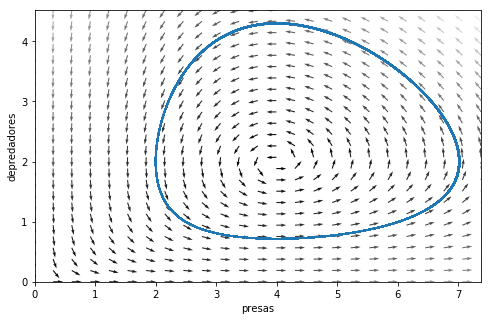

In [31]:
x_max = np.max(integracion[:,0]) * 1.05
y_max = np.max(integracion[:,1]) * 1.05

x = np.linspace(0, x_max, 25)
y = np.linspace(0, y_max, 25)

xx, yy = np.meshgrid(x, y)
uu, vv = sistema_((xx, yy), 0, alfa, beta, gamma, delta)
norm = np.sqrt(uu**2 + vv**2)
uu = uu / norm
vv = vv / norm

plt.figure("Campo de direcciones", figsize=(8,5))
plt.quiver(xx, yy, uu, vv, norm, cmap=plt.cm.gray)
plt.plot(integracion[:, 0], integracion[:, 1])
plt.xlim(0, x_max)
plt.ylim(0, y_max)
plt.xlabel('presas')
plt.ylabel('depredadores')

Todas las trayectorias que se escojan presentarán un comportamiento cíclico al rededor de un punto de equilibrio, donde la población se mantiene estable, para estar en este punto de estabilidad, los parámetros iniciales son de vital importancia. 


Una mejora que se plantea a este modelo es que se debe presentar una limitación del número de presas debido a varios factores (falta de alimento, territorio, etc..), esto se ve reflejado en la expresión de la presa así:

$\frac{dx}{dt}=(\alpha x -rx^{2})-\beta x y$

$\beta$ representa la limitación mencionada anteriormente

/home/usuario/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in true_divide
/home/usuario/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in true_divide


Text(0, 0.5, 'depredadores')

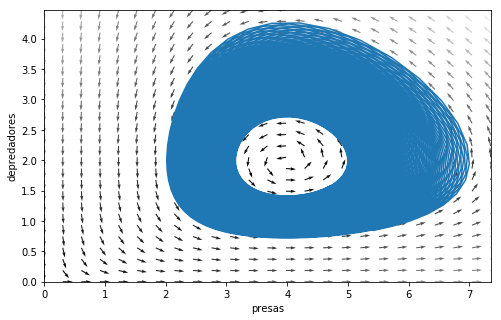

In [32]:
r = 0.001 # se define el parámetro de limitación
def sistema_mod(x,t,alfa,beta,gamma,delta,r): # se modifica el sistema de ecuaciones
    # x[0] equivale a x, x[1] equivale a y
    dx = alfa*x[0]-r*x[0]**2-beta*x[0]*x[1] # ecuación presa
    dy = -delta*x[1]+gamma*x[0]*x[1]  # ecuación depredador
    return np.array([dx, dy])
# solución del sistema de ecuaciones acopladas
integracion_mod, infodict= odeint(sistema_mod, condiciones_iniciales, tiempo,args = (alfa,beta,gamma,delta,r),full_output=True)
infodict['message']  # se muestra un mensaje del status de la integración
x_max = np.max(integracion_mod[:,0]) * 1.05
y_max = np.max(integracion_mod[:,1]) * 1.05

x = np.linspace(0, x_max, 25)
y = np.linspace(0, y_max, 25)

xx, yy = np.meshgrid(x, y)
uu, vv = sistema_mod((xx, yy), 0, alfa, beta, gamma, delta,r)
norm = np.sqrt(uu**2 + vv**2)
uu = uu / norm
vv = vv / norm

plt.figure("Campo de direcciones", figsize=(8,5))
plt.quiver(xx, yy, uu, vv, norm, cmap=plt.cm.gray)
plt.plot(integracion_mod[:, 0], integracion_mod[:, 1])
plt.xlim(0, x_max)
plt.ylim(0, y_max)
plt.xlabel('presas')
plt.ylabel('depredadores')

Nótese en este caso que el punto crítico se comporta como un atractor, y el sistema tiende a estar en este estado de equilibrio sin importar las condiciones iniciales.

Ahora se procede a implementar un codigo de runge kutta hecho por el profe:

In [13]:
from numpy import arange
from pylab import plot,xlabel,ylabel,xlim,show

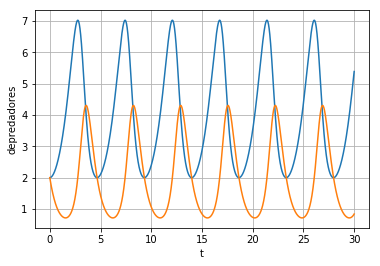

In [16]:
def sistema_(x,t,alfa,beta,gamma,delta):
    # x[0] equivale a x, x[1] equivale a y
    dx = alfa*x[0]-beta*x[0]*x[1] # ecuación presa
    dy = -delta*x[1]+gamma*x[0]*x[1]  # ecuación depredador
    return np.array([dx, dy])
# condiciones de simulación
tiempo_inicial = 0 
tiempo_final = 30
delta_t = 0.01 # intervalo temporal
N = int((tiempo_final-tiempo_inicial)/(delta_t)) # número de divisiones 
tiempo = np.linspace(tiempo_inicial, tiempo_final, N) # vector de tiempo
# parámetros para el sistema considerado
alfa = 1
beta = 0.5
delta = 2
gamma = 0.5
#condiciones iniciales
x_0 = 2 # presas iniciales
y_0 = 2 # depredadores iniciales
condiciones_iniciales =np.array([x_0, y_0],float)
solucion = condiciones_iniciales
x_puntos = []
y_puntos = []
for i in tiempo:
    x_puntos.append(solucion[0])
    y_puntos.append(solucion[1])
    k1 = delta_t*sistema_(solucion,i,alfa,beta,gamma,delta)
    k2 = delta_t*sistema_(solucion+0.5*k1,i+0.5*delta_t,alfa,beta,gamma,delta)
    k3 = delta_t*sistema_(solucion+0.5*k2,i+0.5*delta_t,alfa,beta,gamma,delta)
    k4 = delta_t*sistema_(solucion+k3,i+delta_t,alfa,beta,gamma,delta)
    solucion += (k1+2*k2+2*k3+k4)/6
plot(tiempo,x_puntos)
plot(tiempo,y_puntos)
xlabel('presas')
ylabel('depredadores')
xlabel("t")
plt.grid(True)
show()    
    